**1. Import and Install dependences**
- Tensflow opencv-python mediapipe sklearn matplotlib

In [1]:
import torch

**2. Keypoints Using MP Holistic**

In [2]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt 
import os
import mediapipe as mp
import numpy
import time


In [3]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)


In [6]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                              mp_drawing.DrawingSpec(color = (80, 110, 10), thickness = 1, circle_radius=1),
                              mp_drawing.DrawingSpec(color = (80, 256, 121), thickness = 1, circle_radius=1))
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,mp_drawing.DrawingSpec(color = (80, 110, 10), thickness = 1, circle_radius=2),
                              mp_drawing.DrawingSpec(color = (80, 106, 121), thickness = 2, circle_radius=1))
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color = (80, 110, 10), thickness = 1, circle_radius=2),
                               mp_drawing.DrawingSpec(color = (30, 206, 171), thickness = 2, circle_radius=1))
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color = (80, 110, 10), thickness = 1, circle_radius=2),
                              mp_drawing.DrawingSpec(color = (80, 76, 91), thickness = 1, circle_radius=1))


In [38]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open video capture.")
    exit()
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence= 0.5) as holistic:
    while True:
        ret , frame = cap.read()
        
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        draw_styled_landmarks(image, results)

        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

d:\Semester_7\GraduationProject\SLR\.venv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [40]:
len(results.left_hand_landmarks.landmark)

21

In [22]:
print(results.pose_landmarks.landmark[17])
t = 0
for i in range(len(results.pose_landmarks.landmark)):
    if results.pose_landmarks.landmark[i].visibility > 0.8:
        print(i)

x: 0.57819736
y: 0.136300877
z: -1.97652018
visibility: 0.898877501

0
1
2
3
4
5
6
7
8
9
10
11
12
13
15
17
19
21


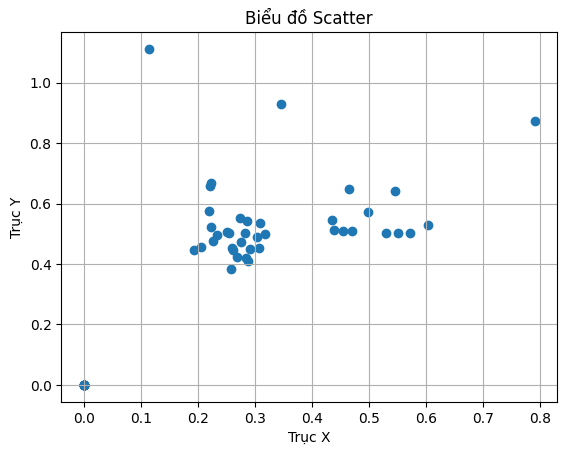

In [39]:
import matplotlib.pyplot as plt

# Tạo dữ liệu cho trục x và y từ landmarks
x = [i.x if i.visibility > 0.8 else 0 for i in results.pose_landmarks.landmark]

y = [i.y if i.visibility > 0.8 else 0 for i in results.pose_landmarks.landmark]
# Kiểm tra sự tồn tại của right_hand_landmarks trước khi thêm vào
if results.right_hand_landmarks:
    x.extend([i.x for i in results.right_hand_landmarks.landmark])
    y.extend([i.y for i in results.right_hand_landmarks.landmark])

# Vẽ biểu đồ scatter
plt.scatter(x, y)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ Scatter')
plt.xlabel('Trục X')
plt.ylabel('Trục Y')

# Hiển thị đồ thị
plt.grid(True)
plt.show()



Nhận xét rút ra: Theo như ta quan sát thì các điểm mà không nhận dạng đượng thì nó sẽ phân bố ngấu nhiên nhưng ta có thể xác định các điểm đó bằng cách quan xát các chỉ số của visibility

In [29]:
draw_landmarks(frame, results)

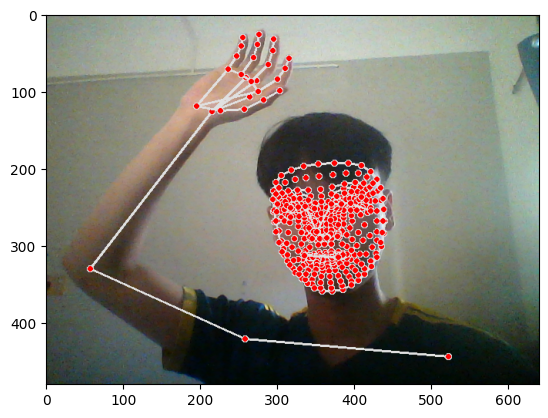

In [30]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

**3. Extra Keypoint Values**

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
len(pose)

33

In [15]:
pose = np.array([res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark).flatten()

In [16]:
pose

array([<generator object <genexpr> at 0x000001623BACD2A0>], dtype=object)

In [17]:
pose.shape

(1,)

In [18]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [19]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

**4. Setup Folders for Collection**

**5. Collect Keypoint Values for Traning and Testing**

In [21]:
A= [0,1,2,1,1,0,1,0,2]
print(A>2)

TypeError: '>' not supported between instances of 'list' and 'int'

In [ ]:
A= [0,1,1,0,1,0,1]
B = [0,1,2,3,4,5,6]
print(B[A==1])

0


In [ ]:
import numpy as np

A = np.array([0, 1, 1, 0, 1, 0, 1])
B = np.array([0, 1, 2, 3, 4, 5, 6])

result = B[A == 1]
print(result)


[1 2 4 6]


In [ ]:
A = [1, 2, 3, 5, 6]
B = [2, 5, 4]

# Chuyển đổi A và B thành các tập hợp (set)
set_A = set(A)
set_B = set(B)

# Lấy hiệu của tập hợp A và B
result = list(set_A - set_B)
print(result)


[1, 3, 5, 6]


In [ ]:
A = [1, 2, 3, 4, 5, 6]
B = [2, 5, 4]
print(A  + B)



[1, 2, 3, 4, 5, 6, 2, 5, 4]


In [ ]:
A = (1,2,2)
print(A
      )

(1, 2, 2)


In [ ]:
                                        from torch import nn.Conn2d
                                                                                                                                                                         

In [4]:
import numpy as np

# Create a sample NumPy array
my_array = np.array([[ 0.012793421745300293, -0.07269719243049622, 0.02398228645324707], [4, 5, 6]])

# Save the array to a text file
np.savetxt('array_file.txt', my_array)

# Load the array from the text file
loaded_array_txt = np.loadtxt('array_file.txt')


loaded_array_txt

array([[ 0.01279342, -0.07269719,  0.02398229],
       [ 4.        ,  5.        ,  6.        ]])